<a href="https://colab.research.google.com/github/ekanathi/ekanathi/blob/main/weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a Linear Regression Model Using Data from an API

## Understanding the Linear Regression (form 2 equations of a straight line)

$y = mx + c$,  simple linear regression

$y = β_0 + β_1X_0 + ɛ$

$y = 5 + (-40)X_0$

API - Application programming interface (API)
- Programs to communicate with each other
- real time - historical data

AIM - Model how temperature depends on humidity or other factors - real world data

$temperature = β_0 + β_1Humidity$

- simple machine learning models

some text -- for -- data


pip install requests, *pandas*, *skitlearn*, *matplotlib*, *seaborn*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
## Set API Key here

In [4]:
API_KEY = '8e5188b6a8ed033c56c41a891f2a8f2e'
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather'

In [5]:
## list cities to collect data

In [6]:
cities = ['Nairobi','Kampala','Mombasa','Kisumu','Kigali','Johannesburg','Cairo','Lagos']

In [7]:
cities

['Nairobi',
 'Kampala',
 'Mombasa',
 'Kisumu',
 'Kigali',
 'Johannesburg',
 'Cairo',
 'Lagos']

In [8]:
## initialize to the empty list - weather data

In [9]:
weather_data=[]

In [10]:
import requests
import time

for city in cities:
   params = {
       'q': city,
       'appid': API_KEY,
       'units': 'metric'
   }
   response = requests.get(BASE_URL, params=params)

   if response.status_code == 200:
       data = response.json()
       weather_data.append({
           'city': city,
           'temperature': data['main']['temp'],
           'humidity': data['main']['humidity'],
           'pressure': data['main']['pressure'],
           'wind_speed': data['wind']['speed']
       })
   else:
       print(f"Failed to get data for {city}")

   # Pause to avoid hitting API rate limit
   time.sleep(1)

In [11]:
data

{'coord': {'lon': 3.75, 'lat': 6.5833},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 25.81,
  'feels_like': 26.74,
  'temp_min': 25.81,
  'temp_max': 25.81,
  'pressure': 1015,
  'humidity': 88,
  'sea_level': 1015,
  'grnd_level': 1015},
 'visibility': 6634,
 'wind': {'speed': 3.84, 'deg': 252, 'gust': 7.09},
 'rain': {'1h': 1.75},
 'clouds': {'all': 100},
 'dt': 1751541048,
 'sys': {'country': 'NG', 'sunrise': 1751520854, 'sunset': 1751565835},
 'timezone': 3600,
 'id': 2332453,
 'name': 'Lagos',
 'cod': 200}

In [12]:
## # Convert to DataFrame

In [13]:
df=pd.DataFrame(weather_data)
print(df)

           city  temperature  humidity  pressure  wind_speed
0       Nairobi        20.62        64      1017        2.57
1       Kampala        25.73        50      1014        3.10
2       Mombasa        27.12        65      1017        7.74
3        Kisumu        24.91        62      1014        2.58
4        Kigali        24.85        44      1015        2.06
5  Johannesburg        17.11        54      1019        0.89
6         Cairo        34.42        36      1008        4.63
7         Lagos        25.81        88      1015        3.84


In [14]:
df_store = pd.DataFrame(weather_data)
print(df_store)

           city  temperature  humidity  pressure  wind_speed
0       Nairobi        20.62        64      1017        2.57
1       Kampala        25.73        50      1014        3.10
2       Mombasa        27.12        65      1017        7.74
3        Kisumu        24.91        62      1014        2.58
4        Kigali        24.85        44      1015        2.06
5  Johannesburg        17.11        54      1019        0.89
6         Cairo        34.42        36      1008        4.63
7         Lagos        25.81        88      1015        3.84


In [15]:
df

,city,temperature,humidity,pressure,wind_speed
0,Nairobi,20.62,64,1017,2.57
1,Kampala,25.73,50,1014,3.10
2,Mombasa,27.12,65,1017,7.74
3,Kisumu,24.91,62,1014,2.58
4,Kigali,24.85,44,1015,2.06
5,Johannesburg,17.11,54,1019,0.89
6,Cairo,34.42,36,1008,4.63
7,Lagos,25.81,88,1015,3.84


Data cleaning and preparation -> ML Ready Data
- Missing data
- Nulls - remove them
- Data preview

In [16]:
print(df.isnull().sum())

city           0
temperature    0
humidity       0
pressure       0
wind_speed     0
dtype: int64


In [17]:
df.dropna(inplace=True)

In [18]:
df

,city,temperature,humidity,pressure,wind_speed
0,Nairobi,20.62,64,1017,2.57
1,Kampala,25.73,50,1014,3.10
2,Mombasa,27.12,65,1017,7.74
3,Kisumu,24.91,62,1014,2.58
4,Kigali,24.85,44,1015,2.06
5,Johannesburg,17.11,54,1019,0.89
6,Cairo,34.42,36,1008,4.63
7,Lagos,25.81,88,1015,3.84


In [19]:
df.head()

,city,temperature,humidity,pressure,wind_speed
0,Nairobi,20.62,64,1017,2.57
1,Kampala,25.73,50,1014,3.10
2,Mombasa,27.12,65,1017,7.74
3,Kisumu,24.91,62,1014,2.58
4,Kigali,24.85,44,1015,2.06


In [20]:
df.tail(3)

,city,temperature,humidity,pressure,wind_speed
5,Johannesburg,17.11,54,1019,0.89
6,Cairo,34.42,36,1008,4.63
7,Lagos,25.81,88,1015,3.84


In [21]:
df.describe()

,temperature,humidity,pressure,wind_speed
count,8.000000,8.00000,8.000000,8.000000
mean,25.071250,57.87500,1014.875000,3.426250
std,5.012075,15.86044,3.270539,2.073079
min,17.110000,36.00000,1008.000000,0.890000
25%,23.792500,48.50000,1014.000000,2.442500
50%,25.320000,58.00000,1015.000000,2.840000
75%,26.137500,64.25000,1017.000000,4.037500
max,34.420000,88.00000,1019.000000,7.740000


In [22]:
df.sample(6)

,city,temperature,humidity,pressure,wind_speed
6,Cairo,34.42,36,1008,4.63
4,Kigali,24.85,44,1015,2.06
1,Kampala,25.73,50,1014,3.10
2,Mombasa,27.12,65,1017,7.74
7,Lagos,25.81,88,1015,3.84
0,Nairobi,20.62,64,1017,2.57


## Exploratory Data Analysis (EDA)
- basic statistics
- correlation analysis
- visualization

In [23]:
df_corr=df.drop('city',axis=1)

In [24]:
df_corr

,temperature,humidity,pressure,wind_speed
0,20.62,64,1017,2.57
1,25.73,50,1014,3.10
2,27.12,65,1017,7.74
3,24.91,62,1014,2.58
4,24.85,44,1015,2.06
5,17.11,54,1019,0.89
6,34.42,36,1008,4.63
7,25.81,88,1015,3.84


In [25]:
df_corr.corr()

,temperature,humidity,pressure,wind_speed
temperature,1.000000,-0.299842,-0.894056,0.613531
humidity,-0.299842,1.000000,0.462331,0.171560
pressure,-0.894056,0.462331,1.000000,-0.220894
wind_speed,0.613531,0.171560,-0.220894,1.000000


In [26]:
df.describe()

,temperature,humidity,pressure,wind_speed
count,8.000000,8.00000,8.000000,8.000000
mean,25.071250,57.87500,1014.875000,3.426250
std,5.012075,15.86044,3.270539,2.073079
min,17.110000,36.00000,1008.000000,0.890000
25%,23.792500,48.50000,1014.000000,2.442500
50%,25.320000,58.00000,1015.000000,2.840000
75%,26.137500,64.25000,1017.000000,4.037500
max,34.420000,88.00000,1019.000000,7.740000


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

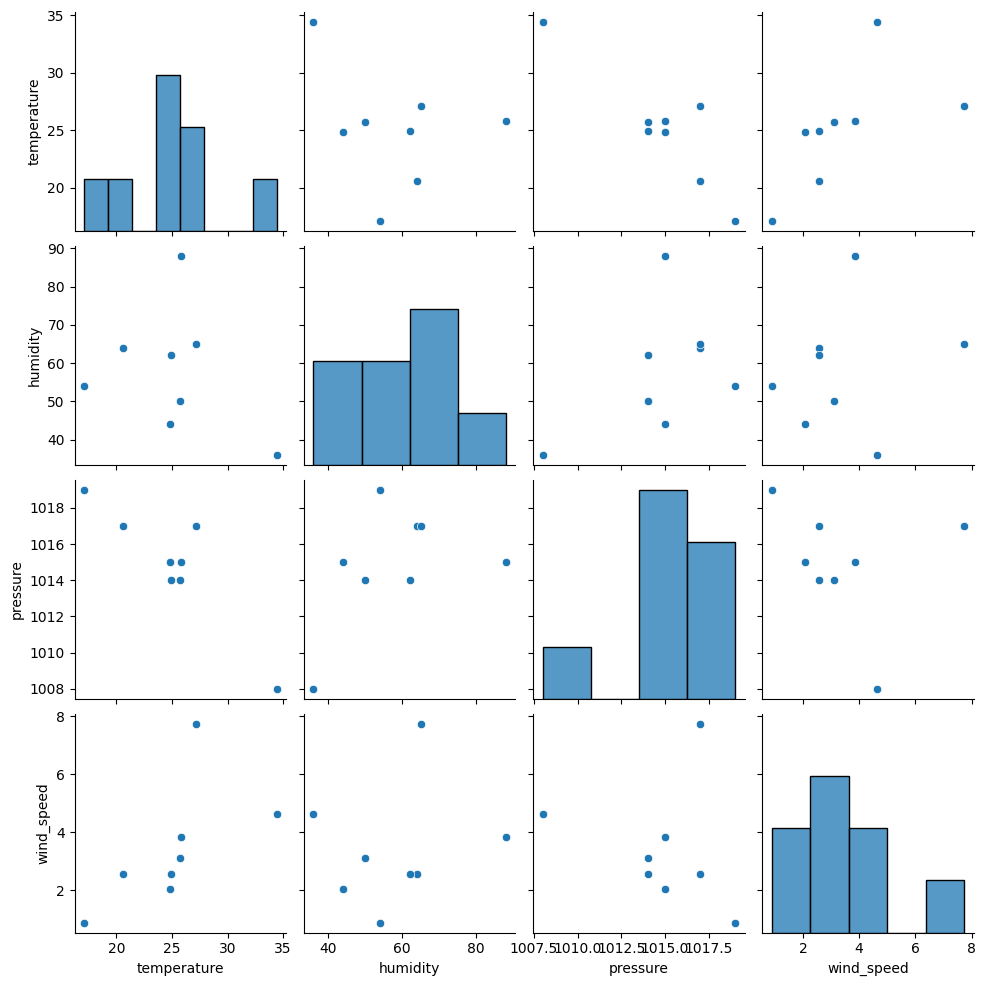

In [28]:
sns.pairplot(df)
plt.show()

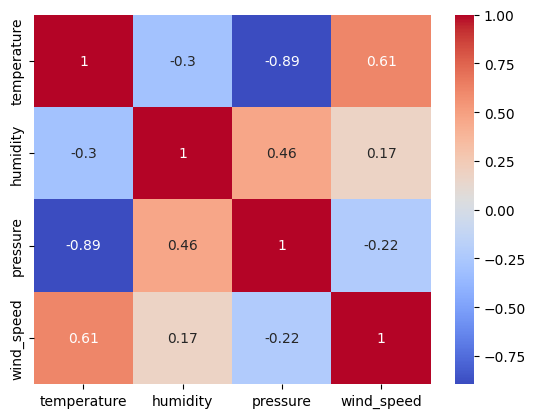

In [29]:
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm')
plt.show()

## Model building
- selecting the features
- temperature based on humidity
- split the data -- 80% training and 20% testing

$y = mx + c$

In [30]:
y=df['temperature']

In [31]:
y

,temperature
0,20.62
1,25.73
2,27.12
3,24.91
4,24.85
5,17.11
6,34.42
7,25.81


In [32]:
x=df[['humidity']]

In [33]:
x

,humidity
0,64
1,50
2,65
3,62
4,44
5,54
6,36
7,88


In [34]:
## Spliting the data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=42)

In [37]:
x_train

,humidity
0,64
7,88
2,65
4,44
3,62
6,36


In [38]:
x_test

,humidity
1,50
5,54


In [39]:
y_train

,temperature
0,20.62
7,25.81
2,27.12
4,24.85
3,24.91
6,34.42


In [40]:
y_test

,temperature
1,25.73
5,17.11


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
## initiatize the model

In [43]:
lr_model=LinearRegression()

In [44]:
lr_model

LinearRegression()

In [45]:
# training the model

In [46]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [47]:
# check the coefficients

In [48]:
print(f'The intercept is {lr_model.intercept_}')

The intercept is 33.73894932262921


In [49]:
print(f'The coefficient is {lr_model.coef_}')

The coefficient is [-0.12452283]


In [50]:
# making predictions

In [51]:
y_pred=lr_model.predict(x_test)

In [52]:
y_pred

array([27.51280783, 27.01471651])

In [53]:
y_test

,temperature
1,25.73
5,17.11


In [54]:
x_test

,humidity
1,50
5,54


In [125]:
(-0.12452283*50) + 33.73894932262921

27.51280782262921

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [57]:
print(f'The mean squared error is {mean_squared_error(y_test,y_pred)}')

The mean squared error is 50.64090642442939


In [58]:
print(f'The mean absolute error is {mean_absolute_error(y_test,y_pred)}')

The mean absolute error is 5.84376216758656


In [59]:
print(f'The r2 score is {r2_score(y_test,y_pred)}')

The r2 score is -1.7261323111110176


In [60]:
# results visualization

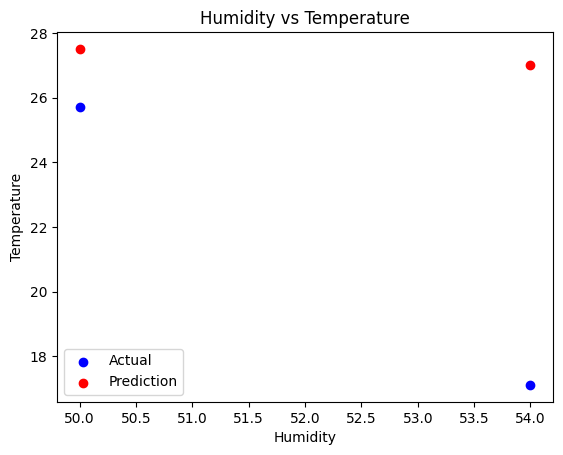

In [61]:
plt.scatter(x_test,y_test,color='blue', label='Actual')
plt.scatter(x_test,y_pred,color='red', label='Prediction')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity vs Temperature')
plt.legend()
plt.show()

In [62]:
#regression line

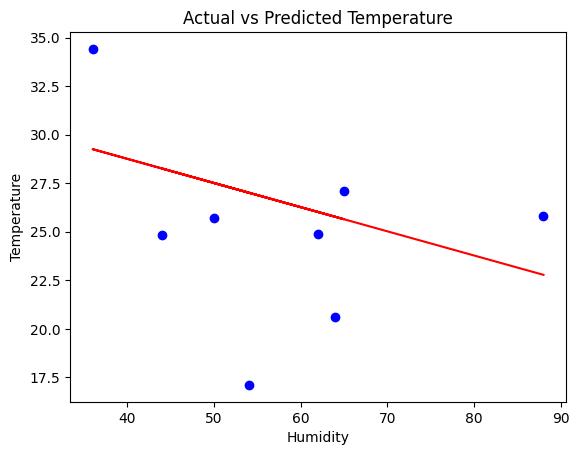

In [63]:
plt.scatter(df['humidity'],df['temperature'],color='blue')
plt.plot(df['humidity'],lr_model.predict(df[['humidity']]),color='red')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [126]:
(-0.12452283*50) + 33.73894932262921

27.51280782262921

## Predicting Temperature based on Weed Speed

In [65]:
y=df['temperature']

In [66]:
y

,temperature
0,20.62
1,25.73
2,27.12
3,24.91
4,24.85
5,17.11
6,34.42
7,25.81


In [67]:
x=df[['wind_speed']]

In [68]:
x

,wind_speed
0,2.57
1,3.10
2,7.74
3,2.58
4,2.06
5,0.89
6,4.63
7,3.84


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=42)

In [71]:
# Spliting the data

In [72]:
y_train

,temperature
0,20.62
7,25.81
2,27.12
4,24.85
3,24.91
6,34.42


In [73]:
y_test

,temperature
1,25.73
5,17.11


In [74]:
x_train

,wind_speed
0,2.57
7,3.84
2,7.74
4,2.06
3,2.58
6,4.63


In [75]:
x_test

,wind_speed
1,3.10
5,0.89


In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
# initialize the model

In [78]:
lr_model=LinearRegression()

In [79]:
lr_model

LinearRegression()

In [80]:
#training the model

In [81]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [82]:
# check the coefficients

In [83]:
print(f'The intercept is {lr_model.intercept_}')

The intercept is 22.563755921535154


In [84]:
print(f'The coefficient is {lr_model.coef_}')

The coefficient is [0.95420429]


In [85]:
# making predictions

In [86]:
y_pred=lr_model.predict(x_test)

In [87]:
y_pred

array([25.52178922, 23.41299774])

In [88]:
y_test

,temperature
1,25.73
5,17.11


In [89]:
x_test

,wind_speed
1,3.10
5,0.89


In [127]:
(0.95420429*3.10)+22.563755921535154

25.521789220535155

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [129]:
print(f'The mean squared error is {mean_squared_error(y_test,y_pred)}')

The mean squared error is 7.216724758674358


In [130]:
print(f'The mean absolute error is {mean_absolute_error(y_test,y_pred)}')

The mean absolute error is 2.3146686746990373


In [132]:
print(f'The r2 score is {r2_score(y_test,y_pred)}')

The r2 score is 0.6115048498514566


In [95]:
# results visualization

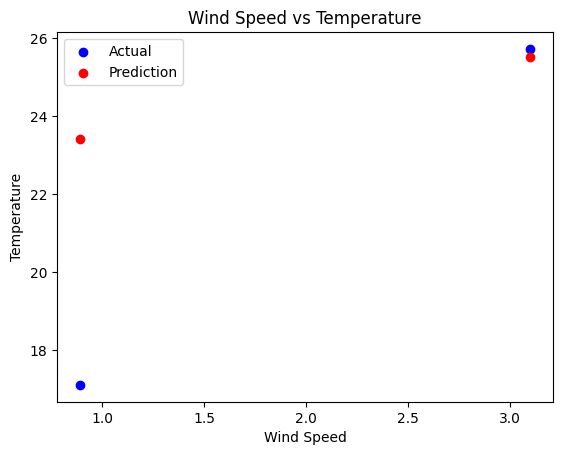

In [96]:
plt.scatter(x_test,y_test,color='blue', label='Actual')
plt.scatter(x_test,y_pred,color='red', label='Prediction')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Wind Speed vs Temperature')
plt.legend()
plt.show()

In [97]:
# regression line

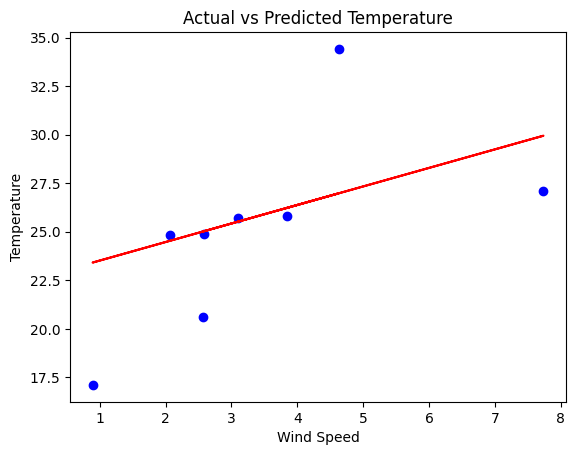

In [98]:
plt.scatter(df['wind_speed'],df['temperature'],color='blue')
plt.plot(df['wind_speed'],lr_model.predict(df[['wind_speed']]),color='red')
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

## Predicting Temperature based on pressure

In [133]:
y=df['temperature']
y

,temperature
0,20.62
1,25.73
2,27.12
3,24.91
4,24.85
5,17.11
6,34.42
7,25.81


In [101]:
x=df[['pressure']]
x

,pressure
0,1017
1,1014
2,1017
3,1014
4,1015
5,1019
6,1008
7,1015


In [102]:
#split the data

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=42)

In [105]:
x_test

,pressure
1,1014
5,1019


In [106]:
x_test

,pressure
1,1014
5,1019


In [107]:
y_train

,temperature
0,20.62
7,25.81
2,27.12
4,24.85
3,24.91
6,34.42


In [108]:
y_test

,temperature
1,25.73
5,17.11


In [109]:
#building linear regression model

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
#initialize the model

In [112]:
lr_model=LinearRegression()

In [113]:
lr_model

LinearRegression()

In [114]:
#training the model

lr_model.fit(x_train,y_train)

LinearRegression()

In [115]:
#check the coefficients

In [116]:
print(f'The intercept is {lr_model.intercept_}')

The intercept is 1221.7962650602415


In [117]:
print(f'The coefficient is {lr_model.coef_}')

The coefficient is [-1.17861446]


$temperature = -1.17861446 * pressure + 1221.7962650602415$

In [118]:
#making predictions

In [119]:
y_pred=lr_model.predict(x_test)

In [120]:
y_pred

array([26.68120482, 20.78813253])

In [121]:
y_test

,temperature
1,25.73
5,17.11


In [122]:
x_test

,pressure
1,1014
5,1019


In [124]:
(-1.17861446*1019) + 1221.7962650602415


20.788130320241635

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [136]:
print(f'The mean squared error is {mean_squared_error(y_test,y_pred)}')

The mean squared error is 7.216724758674358


In [137]:
print(f'The mean absolute error is {mean_absolute_error(y_test,y_pred)}')

The mean absolute error is 2.3146686746990373


In [138]:
print(f'The r2 score is {r2_score(y_test,y_pred)}')

The r2 score is 0.6115048498514566


In [139]:
#results visualization

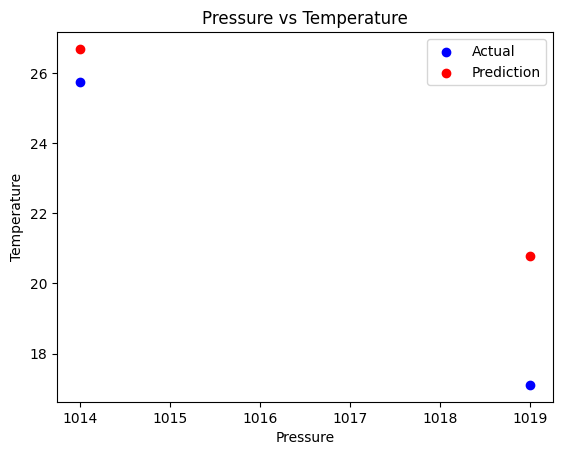

In [141]:
plt.scatter(x_test,y_test,color='blue', label='Actual')
plt.scatter(x_test,y_pred,color='red', label='Prediction')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('Pressure vs Temperature')
plt.legend()
plt.show()

In [142]:
#regression line

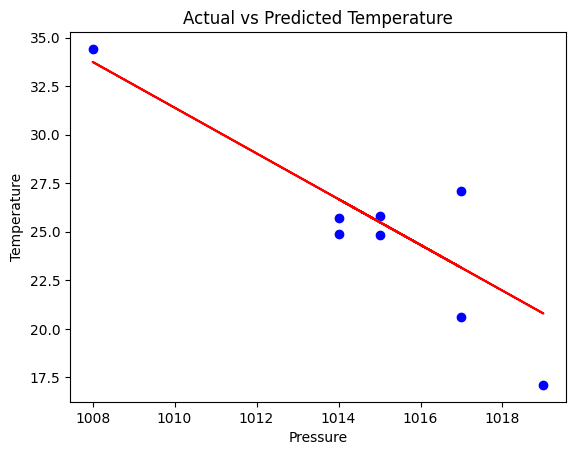

In [144]:
plt.scatter(df['pressure'],df['temperature'],color='blue')
plt.plot(df['pressure'],lr_model.predict(df[['pressure']]),color='red')
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()